In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('cardio_train.csv', sep=';')

In [3]:
df.shape

(70000, 13)

In [4]:
df.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [5]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


### id: id number
### age: in days
### gender: 1-women 2-men
### height: cm
### weight: kg
### ap_hi: systolic blood pressure
### ap_lo: diastolic blood pressure
### cholestrol: 1-normal, 2-above normal, 3-well above normal
### gluc: 1-normal, 2-above normal, 3-well above normal
### smoke: 0-no, 1-yes
### alco: 0-no, 1-yes
### active: 0-no, 1-yes
### cardio(target variable): 0-no, 1-yes

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,70000.0,49972.419900,28851.302323,0.0,25006.75,50001.5,74889.25,99999.0
age,70000.0,19468.865814,2467.251667,10798.0,17664.00,19703.0,21327.00,23713.0
gender,70000.0,1.349571,0.476838,1.0,1.00,1.0,2.00,2.0
height,70000.0,164.359229,8.210126,55.0,159.00,165.0,170.00,250.0
weight,70000.0,74.205690,14.395757,10.0,65.00,72.0,82.00,200.0
ap_hi,70000.0,128.817286,154.011419,-150.0,120.00,120.0,140.00,16020.0
ap_lo,70000.0,96.630414,188.472530,-70.0,80.00,80.0,90.00,11000.0
cholesterol,70000.0,1.366871,0.680250,1.0,1.00,1.0,2.00,3.0
gluc,70000.0,1.226457,0.572270,1.0,1.00,1.0,1.00,3.0
smoke,70000.0,0.088129,0.283484,0.0,0.00,0.0,0.00,1.0


In [8]:
df['cardio'].value_counts(normalize=True) # normalize = true gives fraction of values.

cardio
0    0.5003
1    0.4997
Name: proportion, dtype: float64

In [9]:
# Drop id column
df.drop('id', axis=1, inplace=True) # axis = 1 means coulmn and axis = 0 means rows

In [10]:
df.columns

Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [11]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [12]:
original_rows = len(df)

In [13]:
original_rows

70000

In [14]:
duplicates = df.duplicated().sum()

In [15]:
duplicates

np.int64(24)

In [16]:
# Remove duplicates
df.drop_duplicates(inplace=True)

In [17]:
# Convert age in days to years
df['age_years'] = (df['age']/365.25).round(1)
df.drop(columns=['age'], inplace=True)

In [18]:
df.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
0,2,168,62.0,110,80,1,1,0,0,1,0,50.4
1,1,156,85.0,140,90,3,1,0,0,1,1,55.4
2,1,165,64.0,130,70,3,1,0,0,0,1,51.6
3,2,169,82.0,150,100,1,1,0,0,1,1,48.2
4,1,156,56.0,100,60,1,1,0,0,0,0,47.8


In [19]:
MIN_AP_HI = 60
MAX_AP_HI = 240
MIN_AP_LO = 40
MAX_AP_LO = 160

In [20]:
# Handle outliers
df_clean = df[
    (df['ap_hi'] >= MIN_AP_HI) &
    (df['ap_hi'] <= MAX_AP_HI) &
    (df['ap_lo'] >= MIN_AP_LO) &
    (df['ap_lo'] <= MAX_AP_LO)
]

In [22]:
# hi must be greater than lo
df_clean = df_clean[df_clean['ap_hi'] > df_clean['ap_lo']]

In [23]:
df_clean['pulse_pressure'] = df_clean['ap_hi'] - df_clean['ap_lo']

In [24]:
df_clean['bmi'] = df_clean['weight'] / ((df_clean['height'] / 100) ** 2)

In [25]:
df_clean.shape

(68645, 14)

In [26]:
# Rows lost
original_rows - len(df_clean)

1355

In [27]:
df_clean.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,pulse_pressure,bmi
0,2,168,62.0,110,80,1,1,0,0,1,0,50.4,30,21.967120
1,1,156,85.0,140,90,3,1,0,0,1,1,55.4,50,34.927679
2,1,165,64.0,130,70,3,1,0,0,0,1,51.6,60,23.507805
3,2,169,82.0,150,100,1,1,0,0,1,1,48.2,50,28.710479
4,1,156,56.0,100,60,1,1,0,0,0,0,47.8,40,23.011177


In [28]:
df_clean['gender'] = df_clean['gender'].replace({1:0, 2:1})

In [29]:
df_clean.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,pulse_pressure,bmi
0,1,168,62.0,110,80,1,1,0,0,1,0,50.4,30,21.967120
1,0,156,85.0,140,90,3,1,0,0,1,1,55.4,50,34.927679
2,0,165,64.0,130,70,3,1,0,0,0,1,51.6,60,23.507805
3,1,169,82.0,150,100,1,1,0,0,1,1,48.2,50,28.710479
4,0,156,56.0,100,60,1,1,0,0,0,0,47.8,40,23.011177


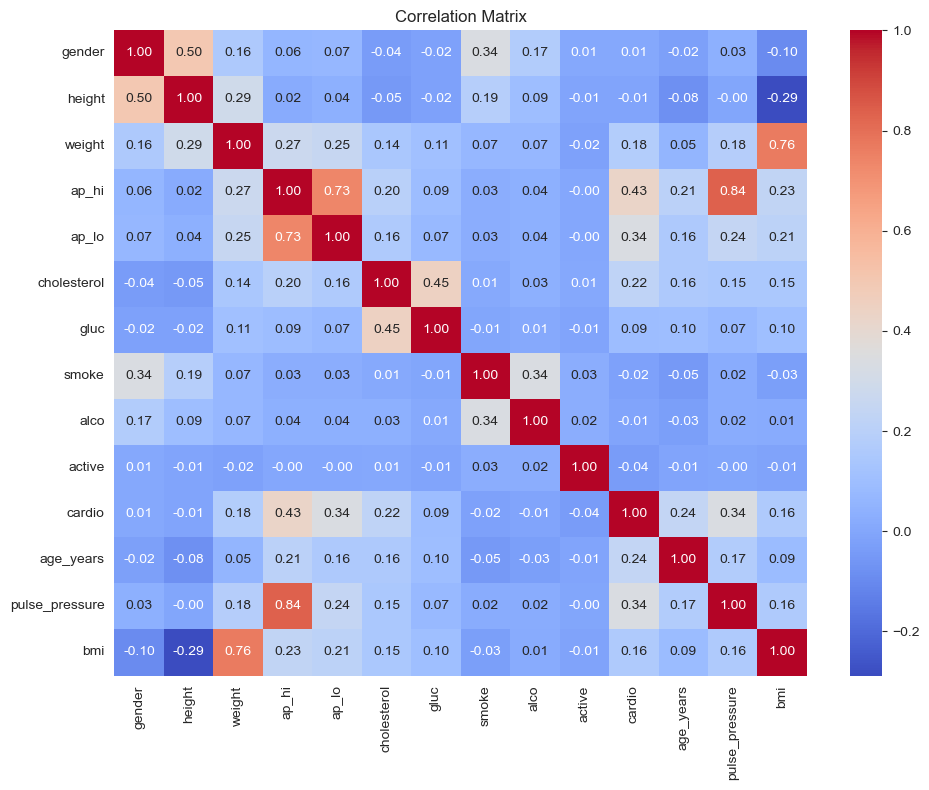

In [30]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_clean.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.savefig('eda_heatmap.png')

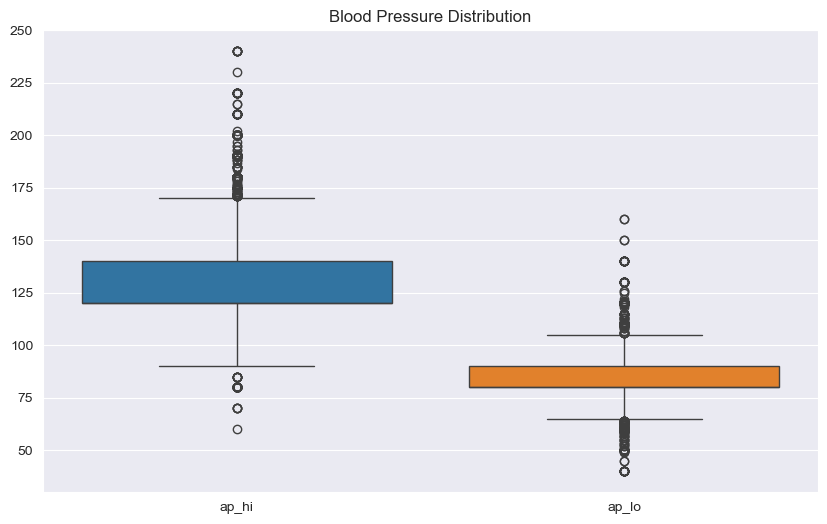

In [31]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_clean[['ap_hi', 'ap_lo']])
plt.title('Blood Pressure Distribution')
plt.savefig('eda_boxplot.png')

In [32]:
X = df_clean.drop('cardio', axis=1)
y = df_clean['cardio']

In [33]:
X.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,age_years,pulse_pressure,bmi
0,1,168,62.0,110,80,1,1,0,0,1,50.4,30,21.967120
1,0,156,85.0,140,90,3,1,0,0,1,55.4,50,34.927679
2,0,165,64.0,130,70,3,1,0,0,0,51.6,60,23.507805
3,1,169,82.0,150,100,1,1,0,0,1,48.2,50,28.710479
4,0,156,56.0,100,60,1,1,0,0,0,47.8,40,23.011177


In [34]:
y

0        0
1        1
2        1
3        1
4        0
        ..
69995    0
69996    1
69997    1
69998    1
69999    0
Name: cardio, Length: 68645, dtype: int64

In [35]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
scaler = StandardScaler()

In [37]:
cols_to_scale = ['height', 'weight', 'ap_hi', 'ap_lo', 'age_years', 'bmi', 'pulse_pressure']

In [38]:
X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])
X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])

In [39]:
X_train.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,age_years,pulse_pressure,bmi
25442,0,-0.163789,0.133212,-0.400013,-0.138718,1,1,0,0,1,-0.884921,-0.459245,0.179336
45816,1,-1.018083,0.621812,-0.400013,-0.138718,1,1,1,1,1,0.476773,-0.459245,1.088224
45277,0,-0.896041,-1.123189,-2.204816,-2.262722,1,1,0,0,0,-1.047732,-1.318781,-0.659056
25964,0,0.446422,-0.494989,-0.400013,-0.138718,1,1,0,0,1,-1.698977,-0.459245,-0.624641
45876,0,-1.140125,0.342612,-0.400013,-0.138718,1,3,0,0,1,0.521176,-0.459245,0.886088


In [40]:
X_test.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,age_years,pulse_pressure,bmi
11637,0,-0.773999,-1.541990,-1.001614,-1.200720,1,1,0,0,1,-1.772983,-0.459245,-1.105211
50347,1,1.300716,0.133212,-0.400013,-0.138718,2,2,0,0,1,0.091946,-0.459245,-0.446590
28945,1,1.910926,0.761413,-0.400013,-0.138718,1,1,1,0,1,0.432370,-0.459245,-0.212268
62358,0,-0.773999,-1.192989,0.803189,-0.138718,1,1,0,0,1,-0.218875,1.259827,-0.774295
23162,0,-0.896041,1.808414,1.404790,0.923284,1,1,0,0,1,1.202023,1.259827,2.156163


In [41]:
# Save the cleaned data
df_clean.to_csv('cardio_train_cleaned.csv', index=False)

In [42]:
# We save the SCALER so we can use it in the Flask App
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

In [43]:
X_train.to_csv('X_train.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_test.to_csv('y_test.csv', index=False)